## MLPClassifier Analysis with various under- and oversampling techniques

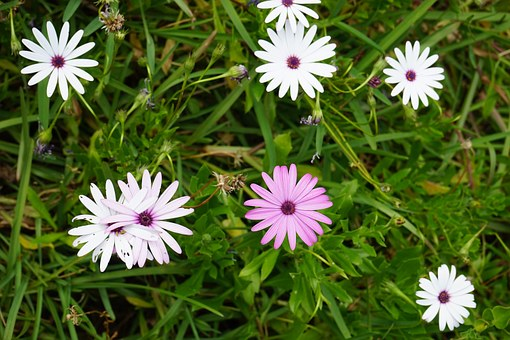

As you this picture tries to visualize we are dealing with a very imbalanced dataset. So the idea of this notebook is to analyse various under- and oversampling techniques to overcome this limitation. The analysis and the tuned XGBoost algorithm will serve as a baseline and the goal is to beat 0.52 in profit_shares.

In [1]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import preprocessing
import utils
import numpy as np
import pandas as pd

In [2]:
data = utils.get_dataset()

In [3]:
%%capture
df = preprocessing.morten_preprocessing_pipeline(data)

In [4]:
columns = ["Responsiveness",
           "Recency",
           "Dt_Customer",
           "Income",
           "MntMeatProducts",
           "MntWines",
           "Partner",
           "MntGoldProds", 
           "MntSweetProducts",
           "Education",
           "MntFishProducts",
           "NumWebVisitsMonth",
           "Response"]

In [5]:
df = df[columns]

In [6]:
seed = 1

### Baseline Implementation for 0.39 Profit Share

In [7]:
X_train, X_test, y_train, y_test = utils.data_split(df, 0.2, seed)

In [8]:
def XGBoost(X_train, X_test, y_train, y_test):
    model = XGBClassifier(colsample_by_tree=0.1,
                                  learning_rate=0.89,
                                  max_depth=8,
                               n_estimators=1000000,
                                  eval_metric="auc",
                                  scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1),
                                  n_jobs=-1, silent=0, verbose=1)
    
    model.fit(X_train, y_train,
                      eval_set=[(X_train, y_train), (X_test, y_test)],
                     verbose=False, early_stopping_rounds=20)
    
    y_pred = model.predict(X_test)

    return utils.profit_share(y_pred, y_test)

In [9]:
XGBoost(X_train, X_test, y_train, y_test)

0.39000000000000001

As it was indicated over or undersampling techniques might not have a big effect on tree based algorithms. Let's also include a Neural Net algorithm: MLPClassifier.

In [10]:
def mlp_classifier(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    mlp = MLPClassifier(hidden_layer_sizes=(10),solver = "lbfgs", max_iter=1000, random_state=seed)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    return utils.profit_share(y_pred, y_test)

In [13]:
mlp_classifier(X_train, X_test, y_train, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.34999999999999998

### Various Under- and Oversampling techniques

The methodology of this analysis is as follows: The dataset will be split initially into Test and Train set. The sampling technique will hence only applied to the **Training** dataset and **not** on the Test set to avoid being biased in the assessment of these techniques. We truly believe, that artificially inflating the dataset (which especially oversampling would do) or removing unwanted samples (undersampling) cannot be an approach. This would be essentially cheating as it transforms the data in a invalid way. 

- Random Undersampling
- etc.

In [14]:
# initial split into train and test data:
train, test = utils.simple_train_split(df, 0.2, seed)

### Undersampling Techniques

In [15]:
from imblearn import under_sampling

#### Random Undersampling
The idea of this technique is, that we randomly throw away samples of the majority dataset.

In [16]:
rus = under_sampling.RandomUnderSampler(random_state=seed)
resamp_x, resamp_y= rus.fit_resample(X_train, y_train)

In [21]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.33000000000000002

#### Tomek Links

In [32]:
tom = under_sampling.TomekLinks(random_state=seed)
resamp_x, resamp_y= tom.fit_resample(X_train, y_train)

In [33]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.44

#### AllKNN

In [34]:
aknn = under_sampling.AllKNN(random_state=seed, n_neighbors=5)
resamp_x, resamp_y= aknn.fit_resample(X_train, y_train)

In [35]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.38

#### ENN (Edited Nearest Neighbours)

In [39]:
enn = under_sampling.EditedNearestNeighbours(random_state=seed, n_neighbors=3)
resamp_x, resamp_y= enn.fit_resample(X_train, y_train)

In [40]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.44

### Oversampling Techniques

In [41]:
from imblearn import over_sampling

#### Random Oversampling

In [42]:
ros = over_sampling.RandomOverSampler(random_state=seed, ratio=0.5)
resamp_x, resamp_y= ros.fit_resample(X_train, y_train)

In [43]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.47999999999999998

#### ADASYN (Adaptive Synthetic Sampling)

In [57]:
ada = over_sampling.ADASYN(random_state=seed, ratio=0.7)
resamp_x, resamp_y= ada.fit_resample(X_train, y_train)

In [58]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.40000000000000002

#### SMOTE (Synthetic Minority Over-Sampling Technique)

In [66]:
smo = over_sampling.SMOTE(random_state=seed, ratio=0.5)
resamp_x, resamp_y= smo.fit_resample(X_train, y_train)

In [67]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.41999999999999998

### Combined Methods

In [69]:
from imblearn import combine

#### SMOTETomek

In [78]:
smotom = combine.SMOTETomek(random_state=seed, ratio=0.8)
resamp_x, resamp_y= smotom.fit_resample(X_train, y_train)

In [79]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.40000000000000002

#### SMOTEENN

In [82]:
smotenn = combine.SMOTEENN(random_state=seed, ratio=0.8)
resamp_x, resamp_y= smotenn.fit_resample(X_train, y_train)

In [83]:
mlp_classifier(resamp_x, X_test, resamp_y, y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.34000000000000002